In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import math


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/amazon.csv",encoding='latin1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
def new_month(old,new_m):
  df.month.replace(old,new_m,inplace=True)
new_month('Janeiro','January')
new_month('Fevereiro','February')
new_month('Março','March')
new_month('Abril','April')
new_month('Maio','May')
new_month('Junho','June')
new_month('Julho','July')
new_month('Agosto','August')
new_month('Setembro','September')
new_month('Outubro','October')
new_month('Novembro','November')
new_month('Dezembro','December')

In [ ]:
df.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [ ]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


worst year hit :
2003
2015
2016


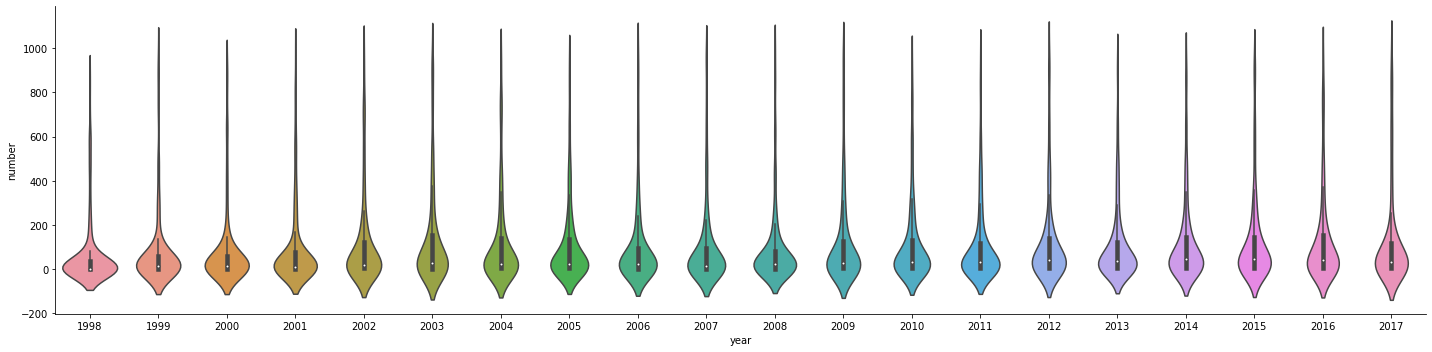

In [ ]:
by_year=df.groupby(['year'],as_index=False).sum()
sns.catplot(x='year',y='number',data=df[['year','number']],kind='violin',aspect=4,estimator=sum);
worst_hit=by_year[by_year['number']>by_year['number'].mean()+by_year['number'].std()]
print("worst year hit :")
for i in range (len(worst_hit)):
  print(worst_hit['year'].values[i])

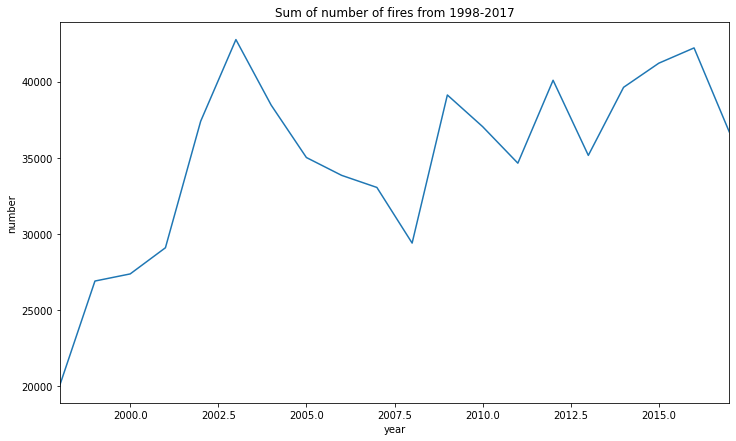

In [ ]:
by_year=df.groupby(['year'],as_index=False).sum()
plt.figure(figsize=[12,7])
plt.xlim([1998,2017])
plt.title("Sum of number of fires from 1998-2017")
sns.lineplot(x='year',y='number',data=by_year)



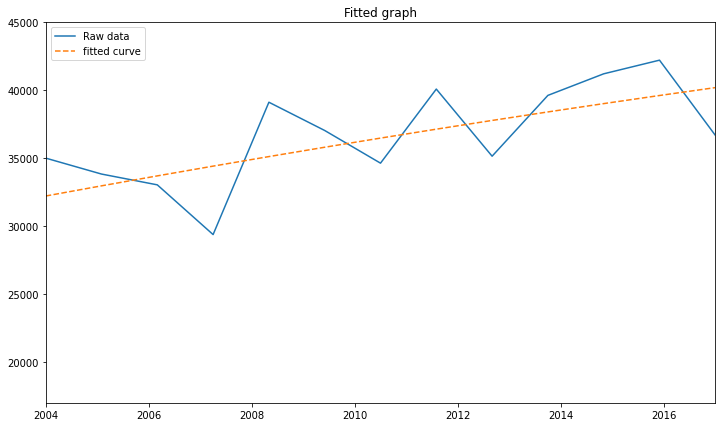

In [ ]:
by_year=by_year[by_year['year']>2004]
z=np.poly1d(np.polyfit(by_year['year'],by_year['number'],2))
years=np.linspace(2004,2017,13)
plt.figure(figsize=[12,7])
plt.plot(years,by_year['number'],'-',label='Raw data')
plt.plot(years,z(years),'--',label='fitted curve')
plt.xlim([2004,2017])
plt.ylim([17000,45000])
plt.title('Fitted graph')
plt.legend()
plt.show()


In [ ]:
for i in range (2018,2026):
  print(i,'-',math.trunc(z(i)))

2018 - 40716
2019 - 41226
2020 - 41724
2021 - 42208
2022 - 42680
2023 - 43138
2024 - 43584
2025 - 44017
